In [91]:
import math

# defining the integrals in problems 1,2 and 3

def f1(x):
    return math.sqrt(1 + (1/x))

def f2(x):
    return x*math.sqrt(1 + x)

def f3(x):
    return 4/(1 + x**2)

In [202]:
def Int_Midpoint(f,a,b,N):
    h = float((b-a)/N)  # length of each sub-interval
    i = 0
    I = 0
    while i != N:
        I += f(a + h*(1 + 2*i)/2)*h  # line parallel to the X-axis passing through the mid-point
        i += 1                       # the mid-point is given by f(...)
    return I

def Int_Trapezoid(f,a,b,N):
    h = float((b-a)/N)  # length of each sub-interval
    i = 0
    I = 0
    while i != N:       # Using the formula of a Trapezoid
        I += (h/2)*(f(a + i*h) + f(a + (i + 1)*h))  # line joining the two points on the curve,
        i += 1                                      # corresponding to the supremum and infimum of the sub-interval
    return I

def Int_Simpson(f,a,b,N):
    h = float((b-a)/N)
    F = f(a) + f(b)  # Acc. to the formuala, these terms can come out of the recursion (out of the summation)

    for i in range(N):
        if i%2 == 0:
            F += 2*f(a + i*h)  # defining the weight dunction for the even terms in the summation
        else:
            F += 4*f(a + i*h)  # # defining the weight dunction for the odd terms in the summation
    I = F*(h/3)
    return I

import random

def Int_MonteCarlo(f,a,b,N):
    pdf = []                  # will store our random numbers (analogy with the probability distribution function i.e. pdf)
    for i in range(N):
        pdf.append(random.random())
    
    F = 0

    for i in range(len(pdf)):
        u = a + (b-a)*pdf[i]  # Monte-Carlo formula for the X-co-ordinates
        F += f(u)             # Corresponding Y-co-ordinate (which act as the height in the formuala of area) are summed
    I = float(((b-a)*F)/N)    # Area = h*F, h is as defined in the previous three methods
    return I

In [203]:
# Question 1

def Q1():
    from tabulate import tabulate

    Mid = []; Trap = []; Simp = []

    for i in range(1,4):
        Mid.append(Int_Midpoint(f1,1,4,8*i))
        Trap.append(Int_Trapezoid(f1,1,4,8*i))
        Simp.append(Int_Simpson(f1,1,4,8*i))

    table = [[8,Mid[0],Trap[0],Simp[0]],[16,Mid[1],Trap[1],Simp[1]],[24,Mid[2],Trap[2],Simp[2]]]
    head = ["N","Midpoint","Trapezoid","Simpson"]

    print(tabulate(table,head), "\n", "The analytical value iz 3.62018.")
    
Q1()
    
    


  N    Midpoint    Trapezoid    Simpson
---  ----------  -----------  ---------
  8     3.61831      3.62396    3.97388
 16     3.61971      3.62114    3.79697
 24     3.61997      3.62061    3.73804 
 The analytical value iz 3.62018.


In [204]:
# Question 2

def Q2():
    val = 0.64379
    i = 1
    I_Mid = 0; I_Trap = 0; I_Simp = Int_Simpson(f2,0,1,10)
    while abs(val - Int_Midpoint(f2,0,1,i)) >= 0.0001:
        I_Mid = Int_Midpoint(f2,0,1,i)
        i += 1
    while abs(val - Int_Trapezoid(f2,0,1,i)) >= 0.0001:
        I_Trap = Int_Trapezoid(f2,0,1,i)
        i += 1
    print(I_Mid,"by Midpoint \n", I_Trap,"by Trapezoid \n",I_Simp,"By Simpson")

Q2()


0.6436795982688696 by Midpoint 
 0.6438926502675922 by Trapezoid 
 0.6437905866263318 By Simpson


The value of pi as obtained by the Monte-Carlo method is 3.140782043829389


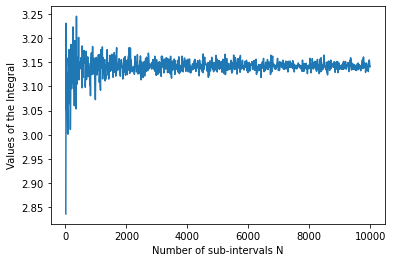

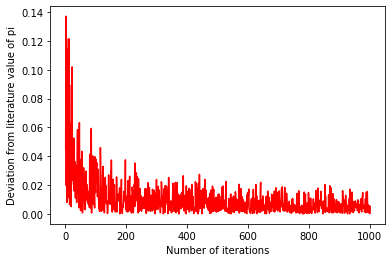

In [216]:
# Question 3

def Q3():
    from matplotlib import pyplot as graph
    N = 10; i = 1
    Y1 = []; X1 = []; X2 = []; Y2 = []
    
    while N <= 10000:
        Y1.append(Int_MonteCarlo(f3,0,1,N))
        X1.append(N)
        i += 1
        X2.append(i)
        Y2.append(abs(3.141592 - Int_MonteCarlo(f3,0,1,N)))

        N += 10
    
    print("The value of pi as obtained by the Monte-Carlo method is",Y1[-1])


    graph.figure(0)
    graph.plot(X1,Y1)
    graph.xlabel("Number of sub-intervals N")
    graph.ylabel("Values of the Integral")

    graph.figure(1)
    graph.plot(X2,Y2, "-r")
    graph.xlabel("Number of iterations")
    graph.ylabel("Deviation from literature value of pi")


    


Q3()
    

        

In [206]:
# Question 4

def den(x):
    return x**2
def num(x):
    return x**3

def Q4():

    print("The C.O.M of mass of the beam as by the numerical integration methods is:")

    p = Int_Midpoint(num,0,2,2000)
    q = Int_Midpoint(den,0,2,2000)
    print(p/q, "By Midpoint")

    r = Int_Trapezoid(num,0,2,2000)
    s = Int_Trapezoid(den,0,2,2000)
    print(r/s, "By Trapezoid")

    u = Int_Simpson(num,0,2,2000)
    v = Int_Simpson(den,0,2,2000)
    print(u/v, "By Simpson")

    x = Int_MonteCarlo(num,0,2,200000)
    y = Int_MonteCarlo(den,0,2,200000)
    print(x/y, "By Monte-Carlo")

Q4()

The C.O.M of mass of the beam as by the numerical integration methods is:
1.4999999062499931 by Midpoint
1.500000187499973 By Trapezoid
1.5000000000000004 By Simpson
1.4954769487532222 By Monte-Carlo
